<h1>FORGED BANK NOTES</h1>

Identifying Forged Bank Notes using:

1. Desicion Trees 
2. Logistic Regression
3. Cluster Analysis

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [3]:
# Load Libraries

import pandas as pd
import numpy as np
import itertools
import sklearn.metrics as sm
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import graphviz 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Load Data
bank = pd.read_csv('data_banknote_authentication.txt', header=None)
bank.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Assign Column Names
bank.columns = ["variance","skewness","curtosis","entropy","target"]
bank.head()

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# Begin EDA
bank.describe()

,variance,skewness,curtosis,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


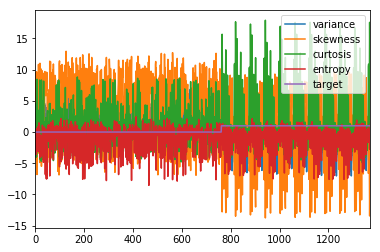

In [5]:
bank.plot()

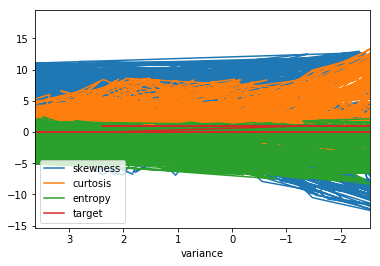

In [6]:
bank.plot('variance')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCB8748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE0CD68>]], dtype=object)

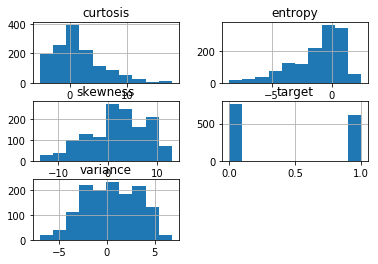

In [7]:
bank.hist()

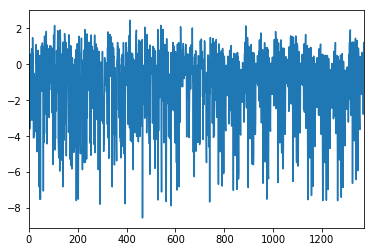

In [8]:
bank['entropy'].plot()

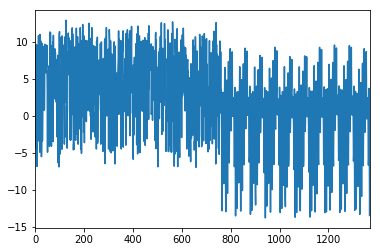

In [9]:
bank['skewness'].plot()

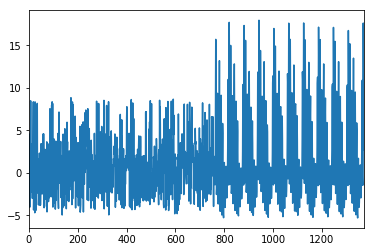

In [10]:
bank['curtosis'].plot()

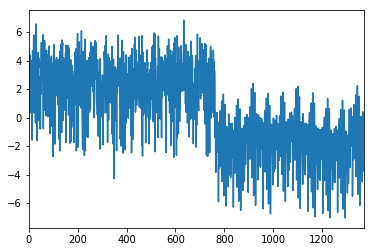

In [11]:
bank['variance'].plot()

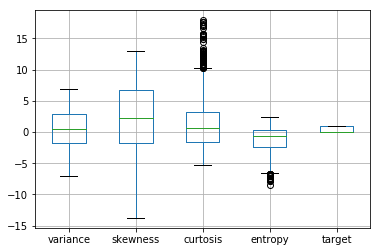

In [12]:
bank.boxplot()

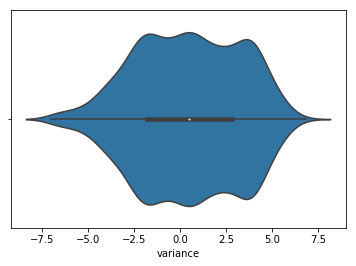

In [13]:
# vars=[["variance","skewness","curtosis","entropy","target"]]
# for i in vars:
#     sns.violinplot(bank.vars)
   
sns.violinplot(bank['variance'])


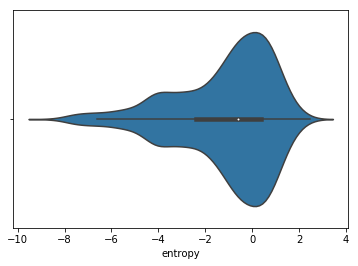

In [14]:
sns.violinplot(bank['entropy'])

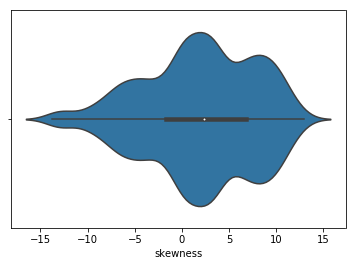

In [15]:
sns.violinplot(bank['skewness'])

Text(0,0.5,'Skewness')

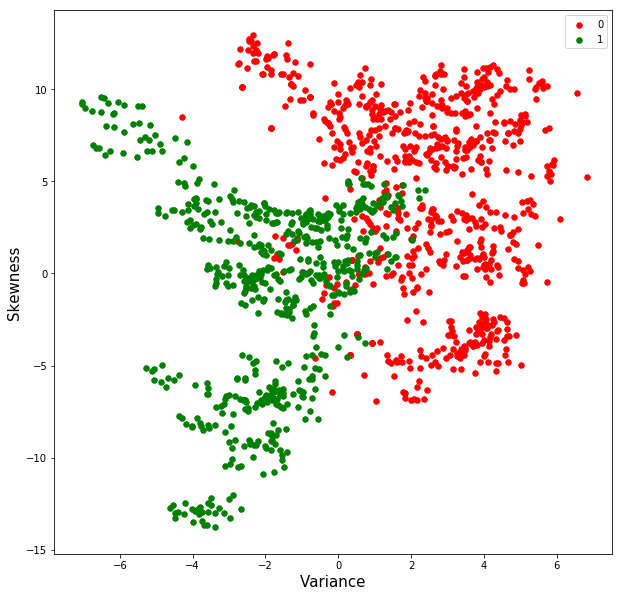

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(bank.target.unique(), ['r', 'g']):
    sub_df = bank.query('target == @target')
    ax.scatter(x=sub_df.variance.values, y=sub_df.skewness.values, 
               color=color, label=target, s=30)
ax.legend(loc='best')
ax.set_xlabel('Variance', size=15)
ax.set_ylabel('Skewness', size=15)

Text(0,0.5,'Curtosis')

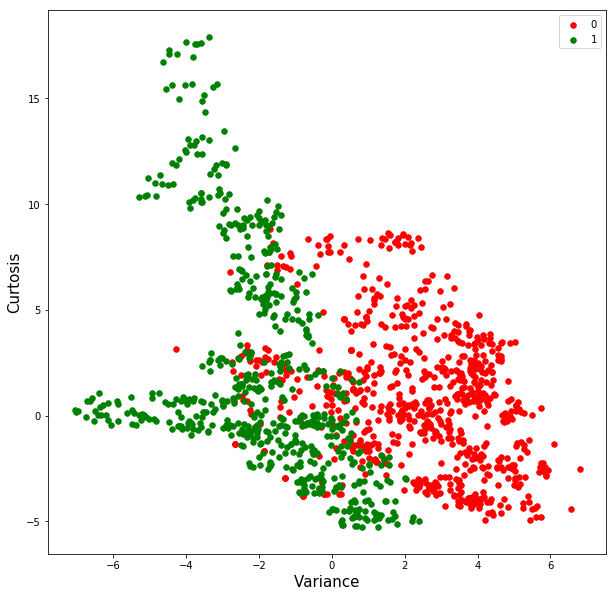

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(bank.target.unique(), ['r', 'g', 'b']):
    sub_df = bank.query('target == @target')
    ax.scatter(x=sub_df.variance.values, y=sub_df.curtosis.values, 
               color=color, label=target, s=30)
ax.legend(loc='best')
ax.set_xlabel('Variance', size=15)
ax.set_ylabel('Curtosis', size=15)

Text(0,0.5,'Skewness')

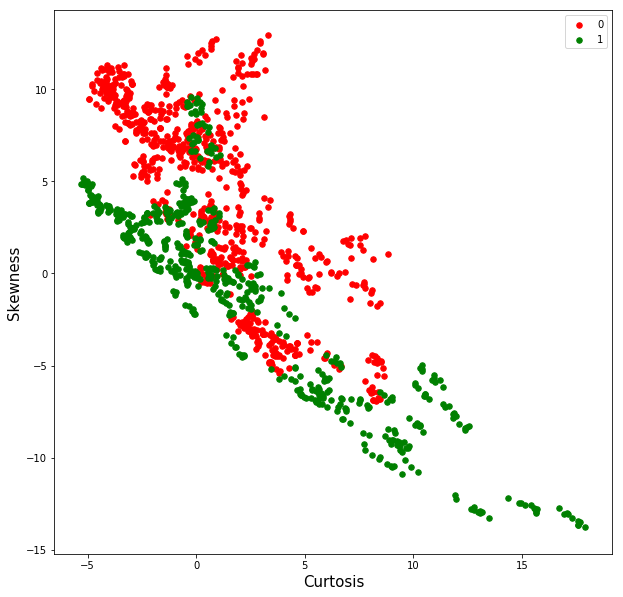

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(bank.target.unique(), ['r', 'g', 'b']):
    sub_df = bank.query('target == @target')
    ax.scatter(x=sub_df.curtosis.values, y=sub_df.skewness.values, 
               color=color, label=target, s=30)
ax.legend(loc='best')
ax.set_xlabel('Curtosis', size=15)
ax.set_ylabel('Skewness', size=15)

Text(0,0.5,'Skewness')

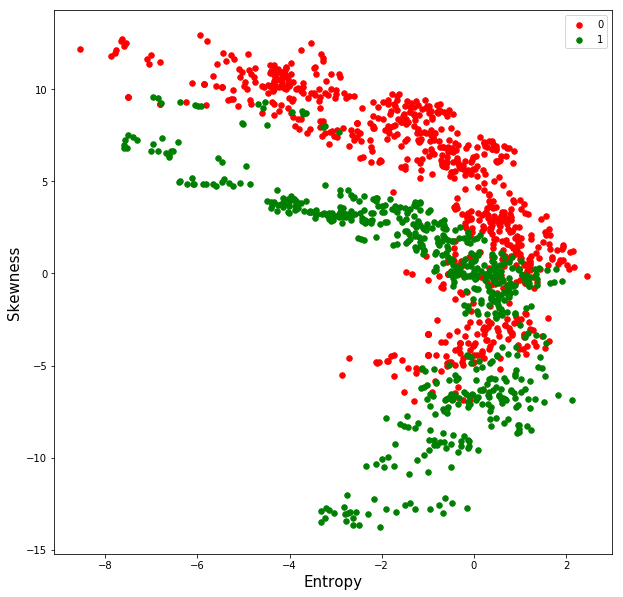

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(bank.target.unique(), ['r', 'g', 'b']):
    sub_df = bank.query('target == @target')
    ax.scatter(x=sub_df.entropy.values, y=sub_df.skewness.values, 
               color=color, label=target, s=30)
ax.legend(loc='best')
ax.set_xlabel('Entropy', size=15)
ax.set_ylabel('Skewness', size=15)

Text(0,0.5,'Variance')

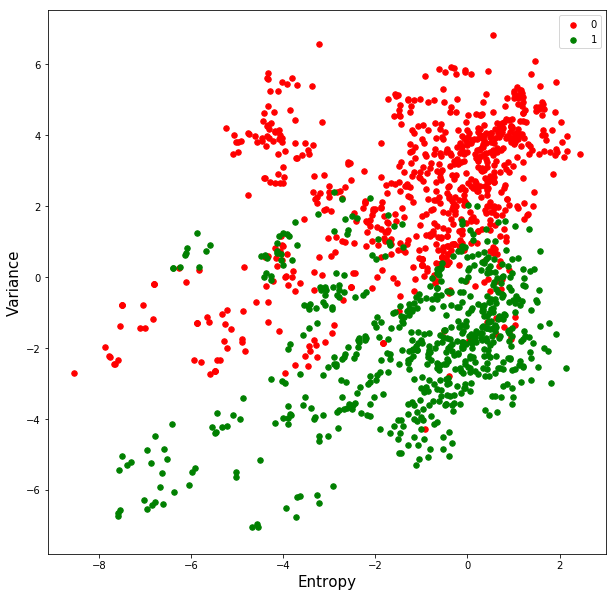

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(bank.target.unique(), ['r', 'g', 'b']):
    sub_df = bank.query('target == @target')
    ax.scatter(x=sub_df.entropy.values, y=sub_df.variance.values, 
               color=color, label=target, s=30)
ax.legend(loc='best')
ax.set_xlabel('Entropy', size=15)
ax.set_ylabel('Variance', size=15)

In [21]:
X = bank[['variance','skewness','curtosis','entropy']]
y = bank.target

<h3>Logistic Regression</h3>

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
logistic_model.predict(np.array([[-4.5,-6,10,-0.5], [6.2, 2.5, 3.6, 2], [1, 2.5, 3.6, 2]]))

array([1, 0, 0], dtype=int64)

In [ ]:
<h3>Decision Trees</h3>

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [25]:
clf.predict(np.array([[-4.5,-6,10,-0.5], [6.2, 2.5, 3.6, 2], [1, 2.5, 3.6, 2]]))

array([1, 0, 0], dtype=int64)

In [26]:
clf.predict(np.array([[-4.5,-6,10,-0.5], [6.2, 2.5, 3.6, 2], [1, 2.5, 3.6, 2]]))

array([1, 0, 0], dtype=int64)

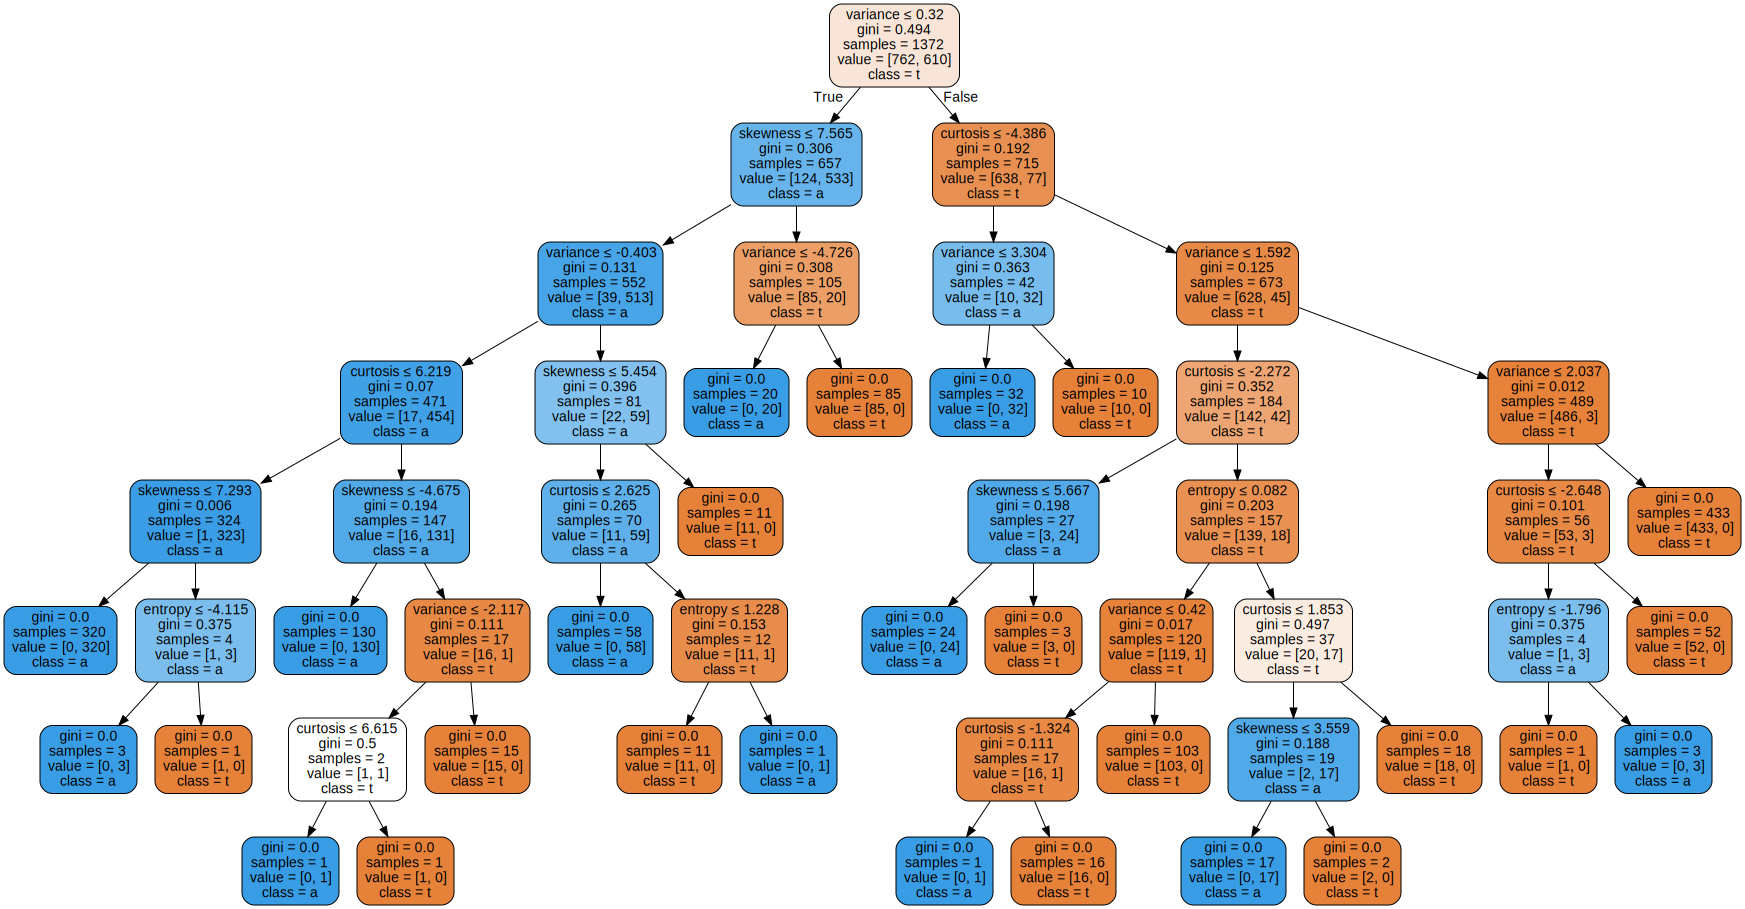

In [27]:
feature_name = ["variance","skewness","curtosis","entropy"]
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,  
                         class_names='target',  
                         filled=True, rounded=True,  
                         special_characters=True
                               )  
graph = graphviz.Source(dot_data)  
graph 

In [29]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=.3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
print(metrics.classification_report(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       535
          1       1.00      1.00      1.00       425

avg / total       1.00      1.00      1.00       960



In [31]:
cf_matrix = metrics.confusion_matrix(y_train, clf.predict(X_train))
print(cf_matrix)

[[535   0]
 [  0 425]]


LEAF SIZE

In [33]:
clfpre = tree.DecisionTreeClassifier(min_samples_leaf=10)

In [34]:
clfpre.fit(X_train, y_train)
print(metrics.classification_report(y_train, clfpre.predict(X_train)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       535
          1       0.98      0.99      0.98       425

avg / total       0.99      0.99      0.99       960



In [35]:
print(metrics.classification_report(y_test, clfpre.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       227
          1       0.92      0.96      0.94       185

avg / total       0.94      0.94      0.94       412



In [36]:
cfpre_matrix = metrics.confusion_matrix(y_test, clfpre.predict(X_test))
print(cfpre_matrix)

[[212  15]
 [  8 177]]


DEPTH

In [37]:
def treereport(X,y, clf):
    X_train = X
    y_train = y
    clf=clf
    clf.fit(X_train, y_train)
    
    print(metrics.classification_report(y_train, clf.predict(X_train)))
    print(metrics.classification_report(y_test, clf.predict(X_test)))
    clf_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))
    print('CONFUSION MATRIX')
    print(clf_matrix)

clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10)

clf2 = tree.DecisionTreeClassifier(max_depth=3)    
clf3 = tree.DecisionTreeClassifier(criterion="entropy") 
clf4 = tree.DecisionTreeClassifier(min_impurity_decrease=0.05)

clf5 = tree.DecisionTreeClassifier(min_samples_leaf=.5)

print('LEAF SAMPLE')
treereport(X_test, y_test, clf1)

print('***************************************************************************')

print('DEPTH')
treereport(X_test, y_test, clf2)
print('***************************************************************************')
print('ENTROPY')
treereport(X_test, y_test, clf3)
print('***************************************************************************')
print('IMPURITY')
treereport(X_test, y_test, clf4)
print('***************************************************************************')
print('%Data Points')
treereport(X_test, y_test, clf5)
print('***************************************************************************')



LEAF SAMPLE
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       227
          1       0.96      0.94      0.95       185

avg / total       0.95      0.95      0.95       412

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       227
          1       0.96      0.94      0.95       185

avg / total       0.95      0.95      0.95       412

CONFUSION MATRIX
[[219   8]
 [ 11 174]]
***************************************************************************
DEPTH
             precision    recall  f1-score   support

          0       0.91      0.96      0.94       227
          1       0.95      0.88      0.92       185

avg / total       0.93      0.93      0.93       412

             precision    recall  f1-score   support

          0       0.91      0.96      0.94       227
          1       0.95      0.88      0.92       185

avg / total       0.93      0.93      0.93       412

CONFUS

In [38]:
# size = ['25','50','75','100']
size = [2,3,4,5,6,7,10,25,50,75]
for i in size:
    print(i)
    clfl = tree.DecisionTreeClassifier(min_samples_leaf = i )
    print('LEAF SAMPLE ', i)

    treereport(X_test, y_test, clfl)
    print('***************************************************************************')

2
LEAF SAMPLE  2
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      0.99      1.00       185

avg / total       1.00      1.00      1.00       412

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      0.99      1.00       185

avg / total       1.00      1.00      1.00       412

CONFUSION MATRIX
[[227   0]
 [  1 184]]
***************************************************************************
3
LEAF SAMPLE  3
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       227
          1       1.00      0.98      0.99       185

avg / total       0.99      0.99      0.99       412

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       227
          1       1.00      0.98      0.99       185

avg / total       0.99      0.99      0.99  

In [39]:
clf3.predict(np.array([[-4.5,-6,10,-0.5], [6.2, 2.5, 3.6, 2], [1, 2.5, 3.6, 2]]))

array([1, 0, 0], dtype=int64)

In [40]:
clf3.feature_importances_

array([ 0.6031709 ,  0.21007442,  0.18675468,  0.        ])

<h3>Cluster Analysis</h3>

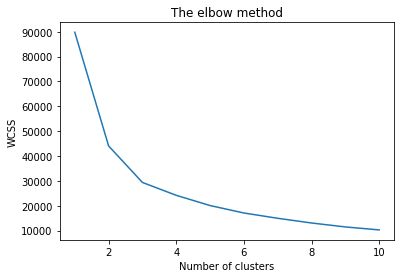

In [46]:
# Applying k-means

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [47]:
kmeans_model = KMeans(n_clusters=3, random_state=1, init='k-means++').fit(X)

kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [55]:
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

array([1, 1, 2, ..., 0, 0, 2])

Text(0,0.5,'Entropy')

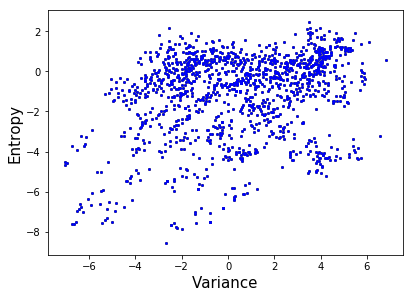

In [70]:
fig = plt.figure(figsize=(14, 4.5))


ax = fig.add_subplot(1, 2, 2)

for kmeans_model.labels_, color in zip((0, 1, 2), ('r','g','b')):
    ax.scatter(x=X.variance, y=X.entropy, color=color, label=kmeans_model.labels_, s=3)
ax.set_xlabel('Variance', size=15)
ax.set_ylabel('Entropy', size=15)


Text(22.2,0.5,'Entropy')

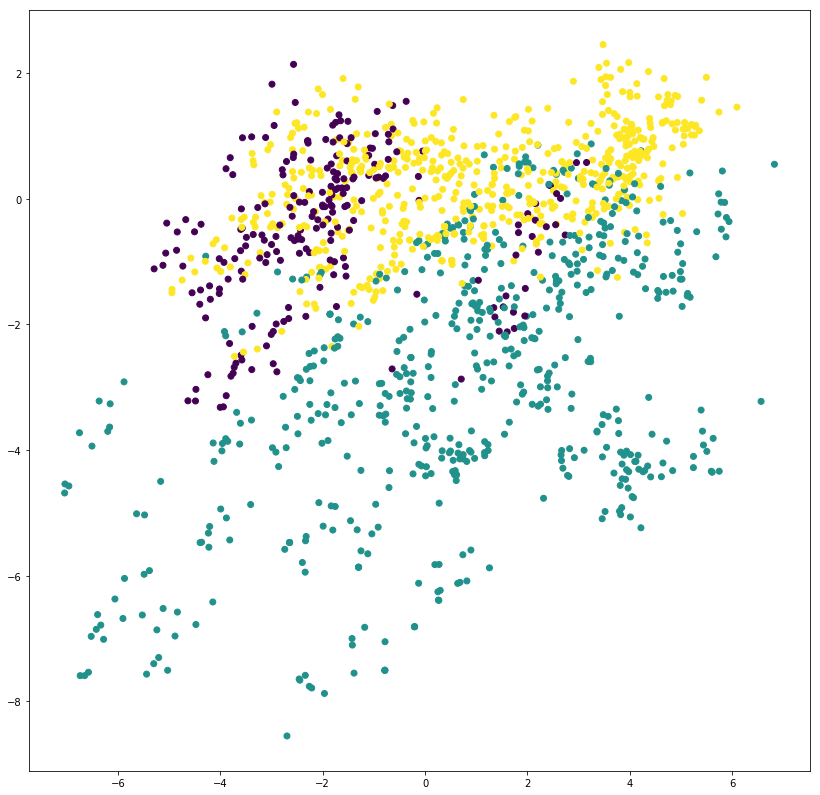

In [113]:

fig = plt.figure(figsize=(14, 14))

dfy = pd.DataFrame(y_kmeans, columns=['Cluster']) 
bankdf = pd.concat([X,dfy], axis=1)

plt.scatter(x=bankdf.variance, y=bankdf.entropy, c=bankdf.Cluster)
ax.set_xlabel('Variance', size=15)
ax.set_ylabel('Entropy', size=15)


In [137]:
bankdf

,variance,skewness,curtosis,entropy,Cluster
0,3.621600,8.66610,-2.807300,-0.446990,1
1,4.545900,8.16740,-2.458600,-1.462100,1
2,3.866000,-2.63830,1.924200,0.106450,2
3,3.456600,9.52280,-4.011200,-3.594400,1
4,0.329240,-4.45520,4.571800,-0.988800,2
5,4.368400,9.67180,-3.960600,-3.162500,1
6,3.591200,3.01290,0.728880,0.564210,2
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,1
9,1.535600,9.17720,-2.271800,-0.735350,1


Text(22.2,0.5,'Curtosis')

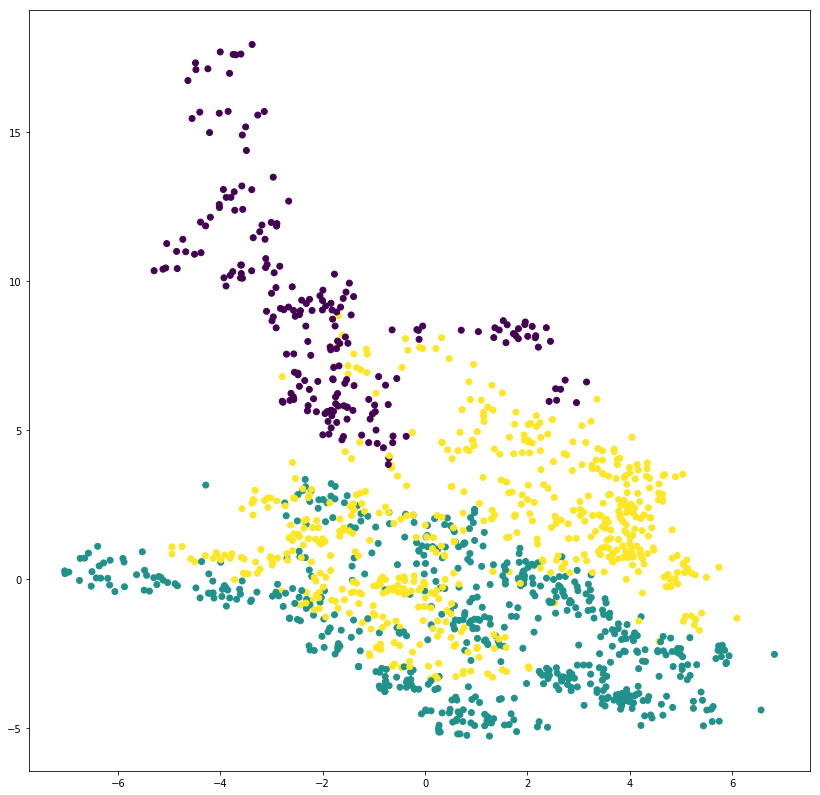

In [114]:
fig = plt.figure(figsize=(14, 14))
plt.scatter(x=bankdf.variance, y=bankdf.curtosis, c=bankdf.Cluster) 
ax.set_xlabel('Variance', size=15)
ax.set_ylabel('Curtosis', size=15)

Text(22.2,0.5,'Curtosis')

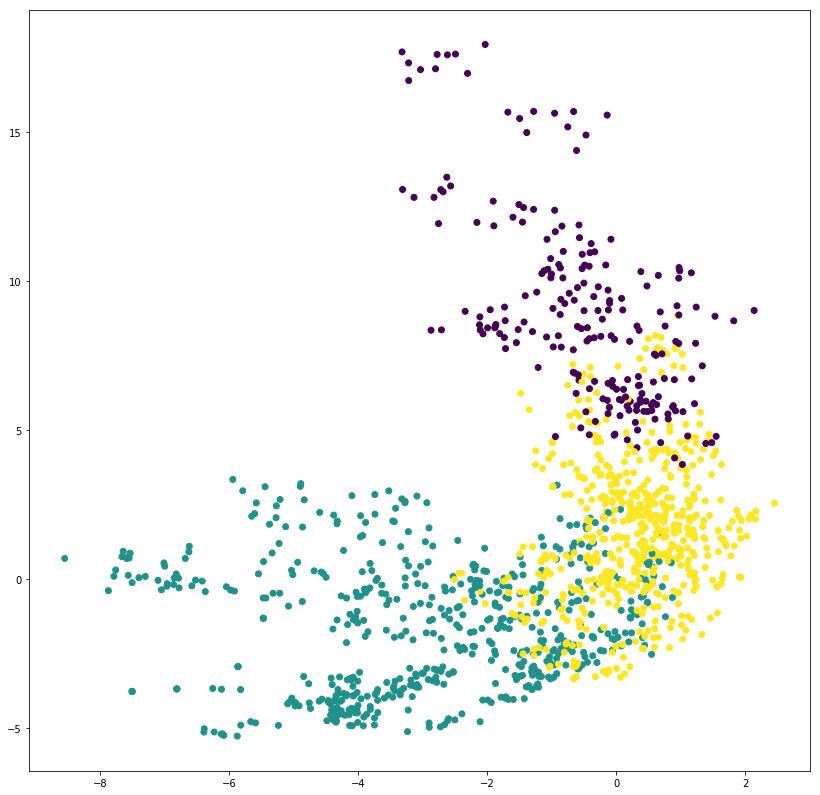

In [115]:
fig = plt.figure(figsize=(14, 14))
plt.scatter(x=bankdf.entropy, y=bankdf.curtosis, c=bankdf.Cluster) 
ax.set_xlabel('Entropy', size=15)
ax.set_ylabel('Curtosis', size=15)

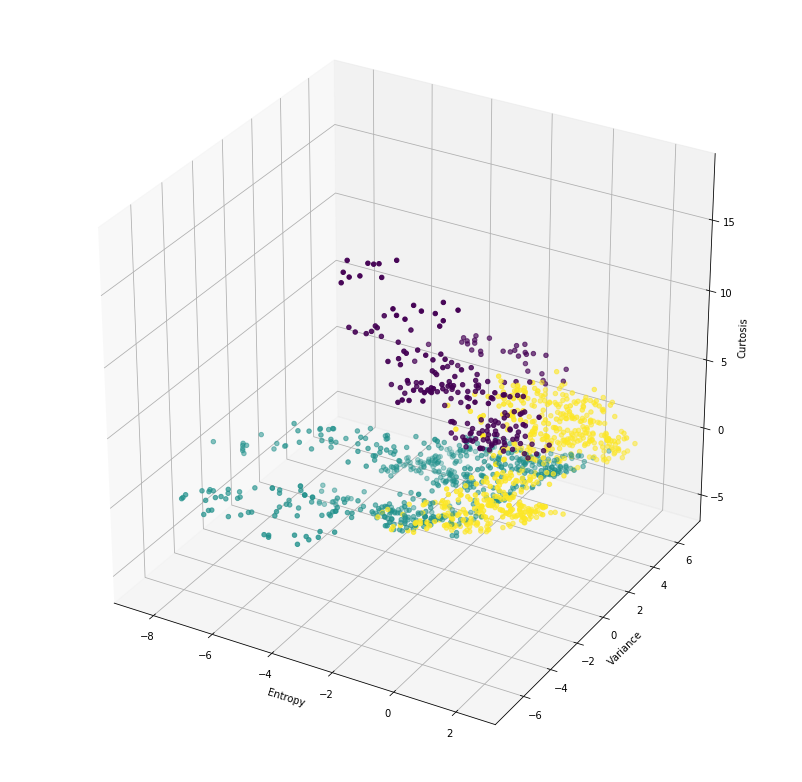

In [132]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

x =bankdf.entropy
y =bankdf.variance
z =bankdf.curtosis
c=bankdf.Cluster

ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Entropy')
ax.set_ylabel('Variance')
ax.set_zlabel('Curtosis')
plt.show()

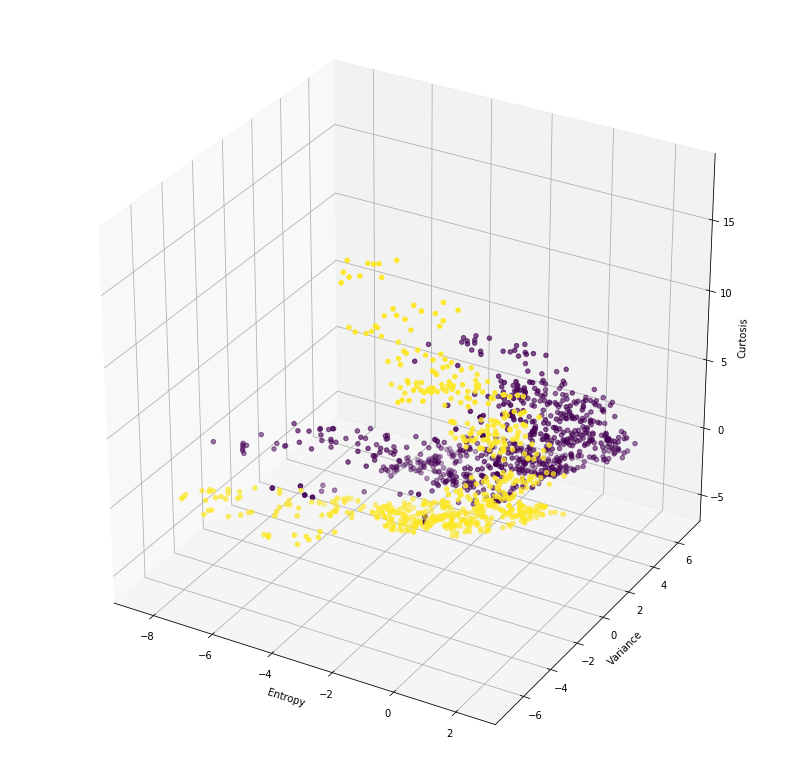

In [133]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

x =bank.entropy
y =bank.variance
z =bank.curtosis
c=bank.target

ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Entropy')
ax.set_ylabel('Variance')
ax.set_zlabel('Curtosis')
plt.show()

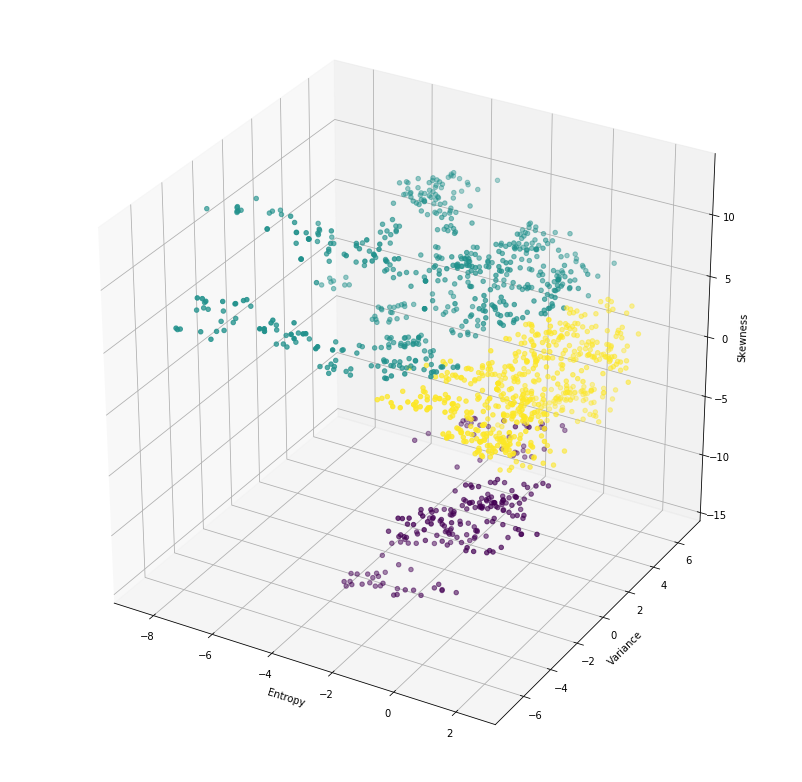

In [134]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

x =bankdf.entropy
y =bankdf.variance
z =bankdf.skewness
c=bankdf.Cluster

ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Entropy')
ax.set_ylabel('Variance')
ax.set_zlabel('Skewness')
plt.show()

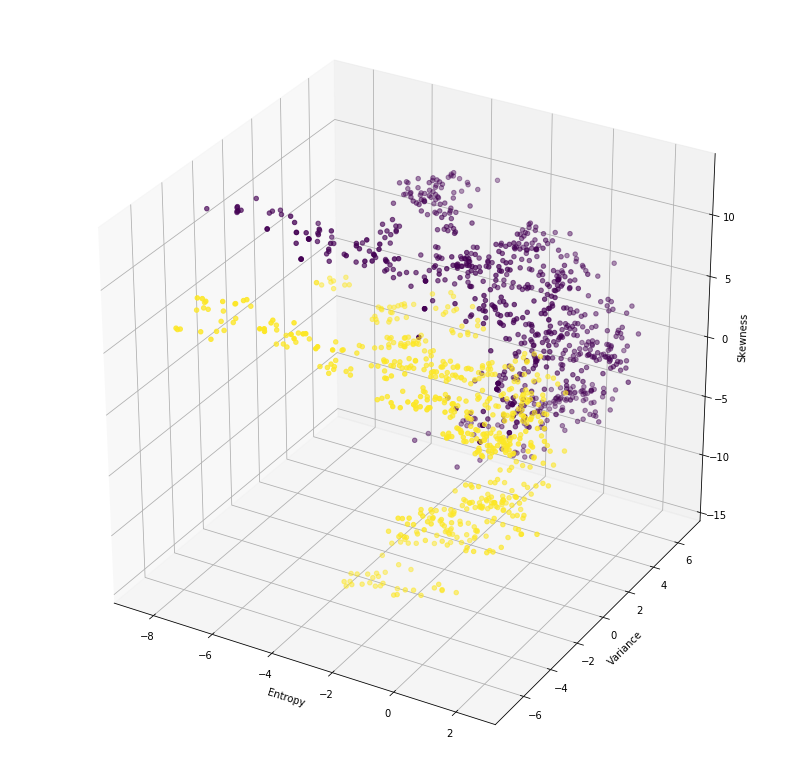

In [136]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

x =bank.entropy
y =bank.variance
z =bank.skewness
c=bank.target

ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Entropy')
ax.set_ylabel('Variance')
ax.set_zlabel('Skewness')
plt.legend()
plt.show()